**CARGAR LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
df = sns.load_dataset("mpg")
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [2]:
df.shape

(398, 9)

**PREPROCESAMIENTO**

In [3]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [4]:
# Opcional: eliminar filas con nulos
df.dropna(inplace=True)
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


**TIPOS DE DATOS**

In [5]:
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object


In [6]:
print(df.duplicated().sum())

0


**Verificar valores únicos en columnas categóricas**

In [7]:
print(df['origin'].unique())
print(df['name'].unique())

['usa' 'japan' 'europe']
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 

**VISUALIZACIONES**

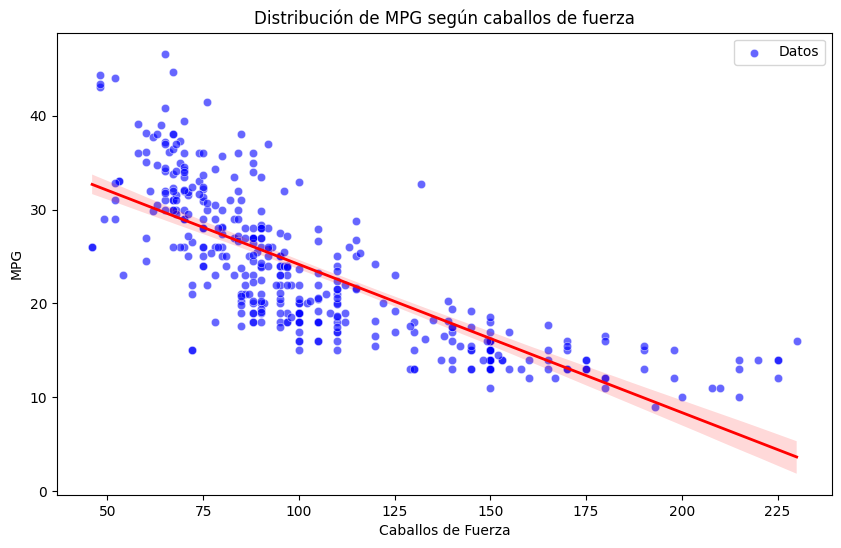

In [8]:
# 1 Distribución de mpg según caballos de fuerza
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con sns.scatterplot
sns.scatterplot(data=df, x='horsepower', y='mpg', color='blue', alpha=0.6, label="Datos")

# Agregar línea de regresión con sns.regplot
sns.regplot(data=df, x='horsepower', y='mpg', scatter=False, color='red', line_kws={'linewidth':2, 'label':'Regresión'})

plt.title('Distribución de MPG según caballos de fuerza')
plt.xlabel('Caballos de Fuerza')
plt.ylabel('MPG')
plt.legend()
plt.show()

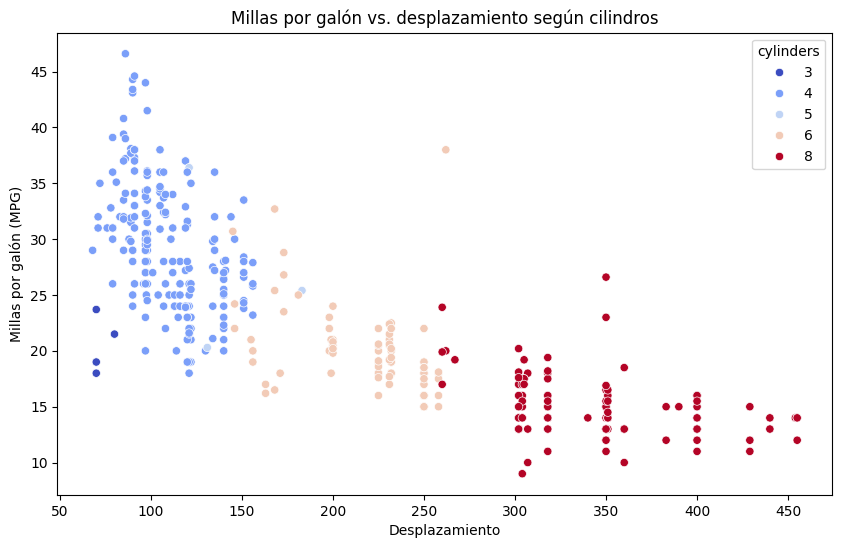

In [9]:
#2 Millas por galón vs. Desplazamiento según cilindros
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='displacement', y='mpg', hue='cylinders', palette='coolwarm')  # Cambia la paleta de colores
plt.title('Millas por galón vs. desplazamiento según cilindros')
plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galón (MPG)')
plt.show()


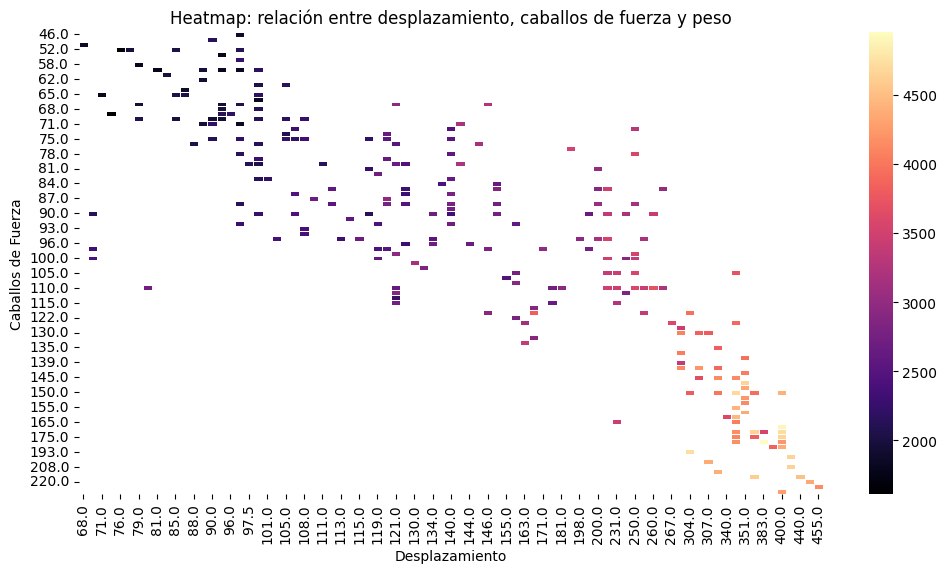

In [25]:
#3 Relación entre Desplazamiento, Caballos de Fuerza y Peso

# Crear una tabla pivote con desplazamiento y caballos de fuerza como ejes, y peso como valores
heatmap_data = df.pivot_table(index='horsepower', columns='displacement', values='weight', aggfunc='mean')

# Crear el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='magma', annot=False, linewidths=0.5, cbar=True)

# Personalizar el gráfico
plt.title('Heatmap: relación entre desplazamiento, caballos de fuerza y peso')
plt.xlabel('Desplazamiento')
plt.ylabel('Caballos de Fuerza')
plt.show()

<ipython-input-11-c906ac3e6f5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cylinders', y='acceleration', palette='YlGnBu')


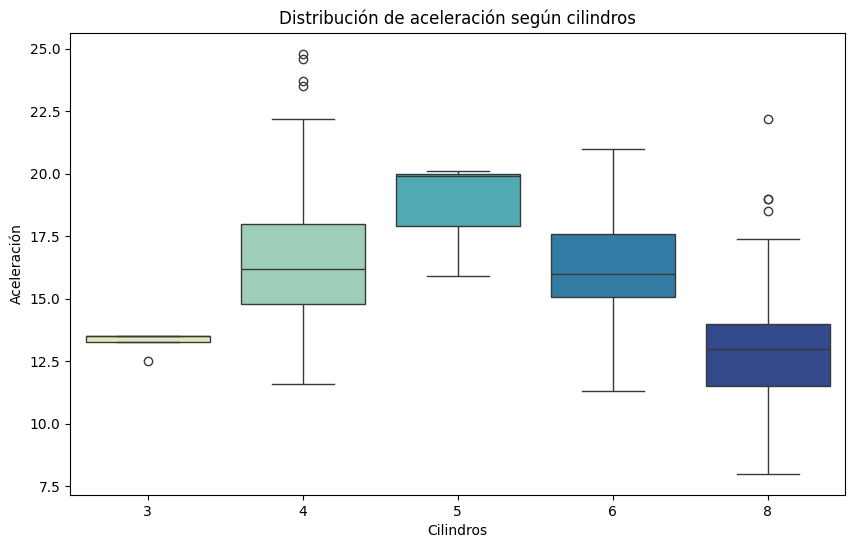

In [11]:
# 4 Aceleración vs. Cilindros

plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(data=df, x='cylinders', y='acceleration', palette='YlGnBu')

plt.title('Distribución de aceleración según cilindros')
plt.xlabel('Cilindros')
plt.ylabel('Aceleración')

plt.show()

<ipython-input-12-79efa0373e2b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mpg', y='name', data=bottom_5_mpg, palette='YlGnBu')  # Eje X y Y intercambiados para barras horizontales


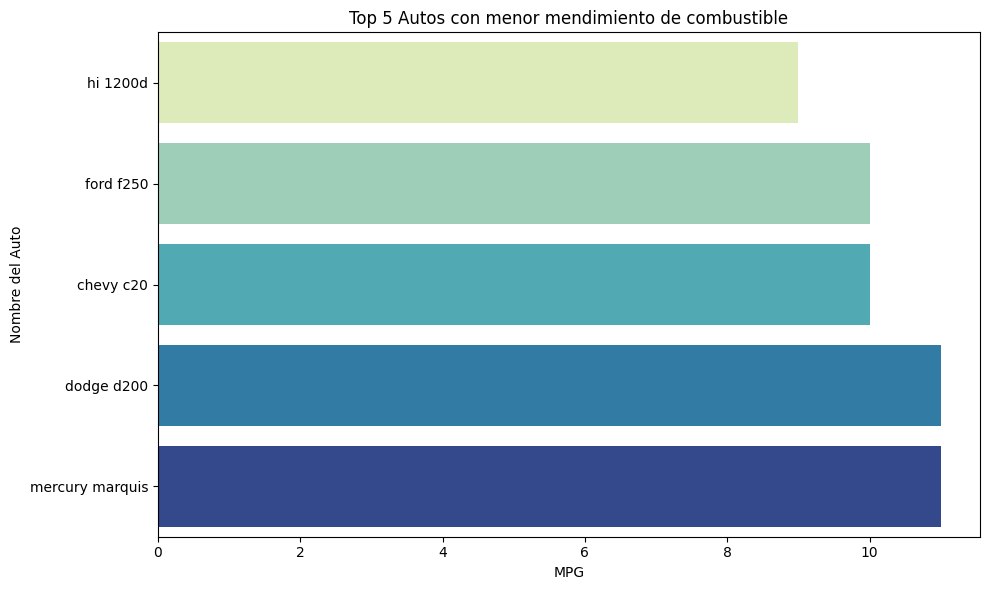

In [12]:
# 5 Autos con menor rendimiento de combustible
# Obtener el top 5 de autos con menor rendimiento de combustible
bottom_5_mpg = df.nsmallest(5, 'mpg')

plt.figure(figsize=(10, 6))
sns.barplot(x='mpg', y='name', data=bottom_5_mpg, palette='YlGnBu')  # Eje X y Y intercambiados para barras horizontales
plt.title('Top 5 Autos con menor mendimiento de combustible')
plt.xlabel('MPG')
plt.ylabel('Nombre del Auto')
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()


<ipython-input-13-bb2923d528eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='name', data=top_5_lightest, palette='YlGnBu')


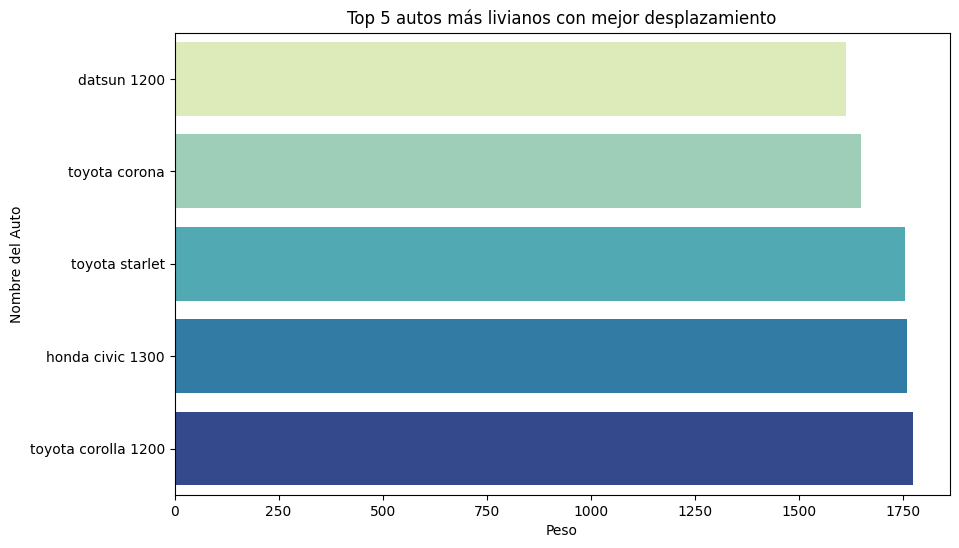

In [13]:
#6 Top 5 Autos más Livianos con Mejor Desplazamiento
# Ordenar el DataFrame por peso (ascendente) y desplazamiento (descendente)
df_sorted = df.sort_values(by=['weight', 'displacement'], ascending=[True, False])

# Obtener los 5 primeros autos
top_5_lightest = df_sorted.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='weight', y='name', data=top_5_lightest, palette='YlGnBu')
plt.title('Top 5 autos más livianos con mejor desplazamiento')
plt.xlabel('Peso')
plt.ylabel('Nombre del Auto')
plt.show()


<ipython-input-14-0f64687a2748>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='power_displacement_ratio', y='name', data=top_5_cars, palette='magma')


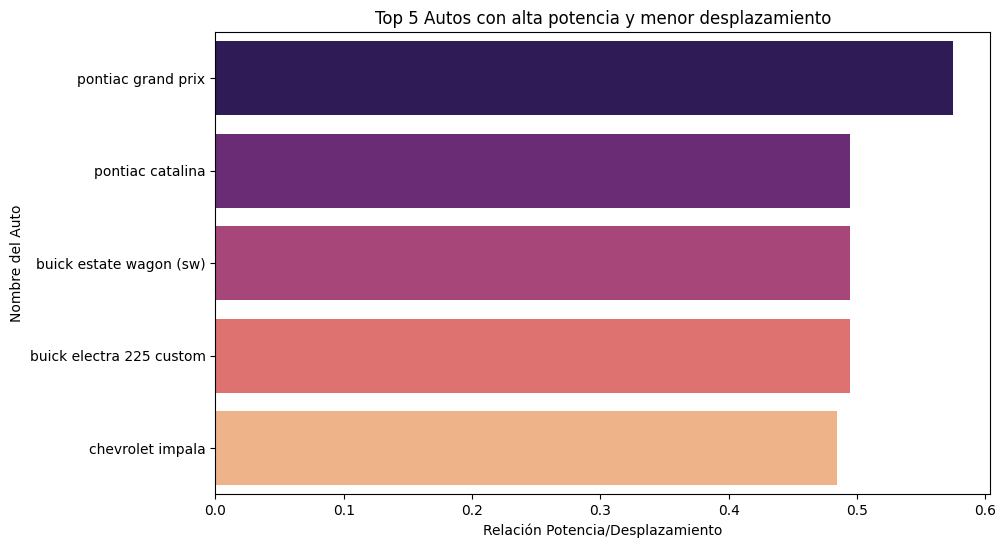

In [14]:
#7 Top 5 Autos con Alta Potencia y Menor Desplazamiento
# Crear una nueva columna combinada de potencia y desplazamiento
df['power_displacement_ratio'] = df['horsepower'] / df['displacement']

# Ordenar el DataFrame por potencia (descendente) y desplazamiento (ascendente)
df_sorted = df.sort_values(by=['horsepower', 'displacement'], ascending=[False, True])

# Obtener los 5 autos con mayor potencia y menor desplazamiento
top_5_cars = df_sorted.head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='power_displacement_ratio', y='name', data=top_5_cars, palette='magma')
plt.title('Top 5 Autos con alta potencia y menor desplazamiento')
plt.xlabel('Relación Potencia/Desplazamiento')
plt.ylabel('Nombre del Auto')
plt.show()


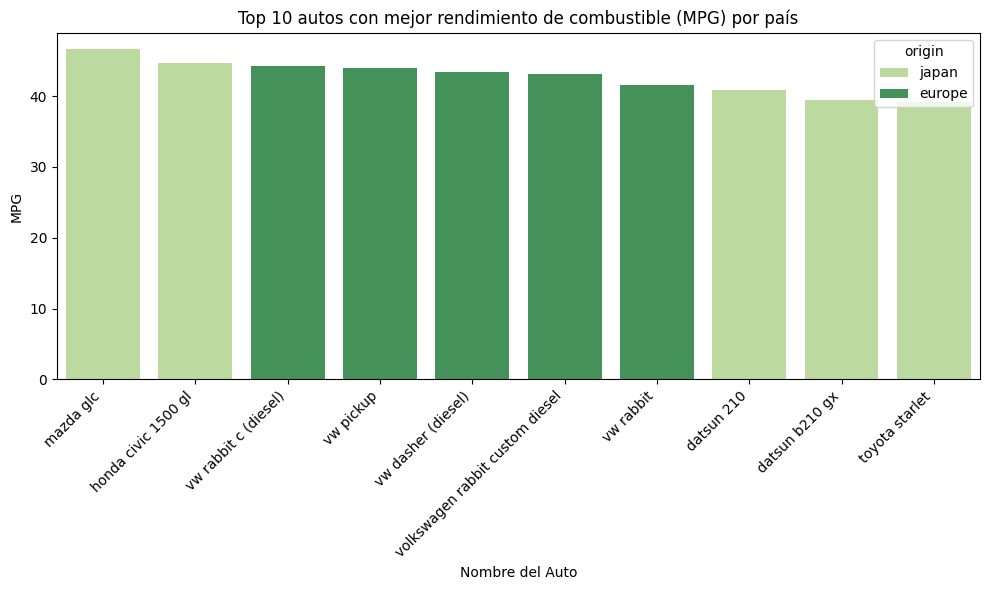

In [15]:
# 8: Top 10 Autos con Mejor Rendimiento de Combustible

# Obtener el top 10 autos con mejor rendimiento de combustible
top_10_mpg = df.nlargest(10, 'mpg')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='mpg', data=top_10_mpg, hue='origin', palette='YlGn')

# Título y etiquetas
plt.title('Top 10 autos con mejor rendimiento de combustible (MPG) por país')
plt.xlabel('Nombre del Auto')
plt.ylabel('MPG')

# Ajustar el diseño
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje X
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [16]:
#8.1
# Verificar la representación de cada país en el top 10
country_counts = top_10_mpg['origin'].value_counts()
print(country_counts)


origin
japan     5
europe    5
Name: count, dtype: int64


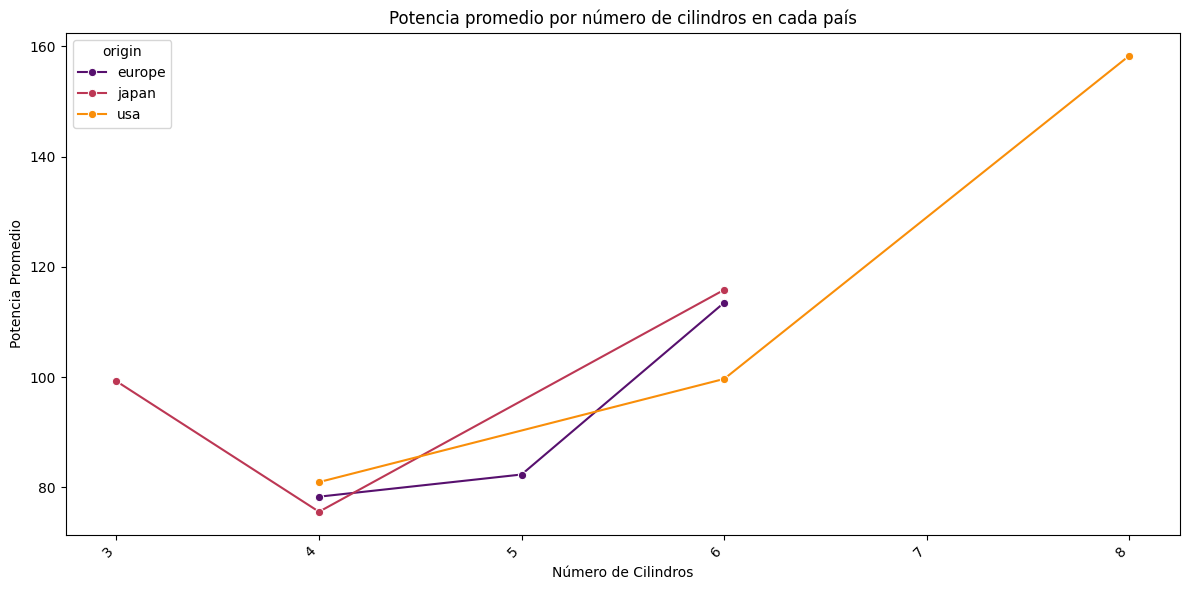

In [17]:
#9 Potencia promedio por número de cilindros en cada país
# Agrupar por país de origen y calcular la potencia promedio por número de cilindros
cyl_power = df.groupby(['origin', 'cylinders'])['horsepower'].mean().reset_index()

# Crear la visualización con gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='cylinders', y='horsepower', hue='origin', data=cyl_power, marker='o', palette='inferno')

# Título y etiquetas
plt.title('Potencia promedio por número de cilindros en cada país')
plt.xlabel('Número de Cilindros')
plt.ylabel('Potencia Promedio')

# Ajustar el diseño
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


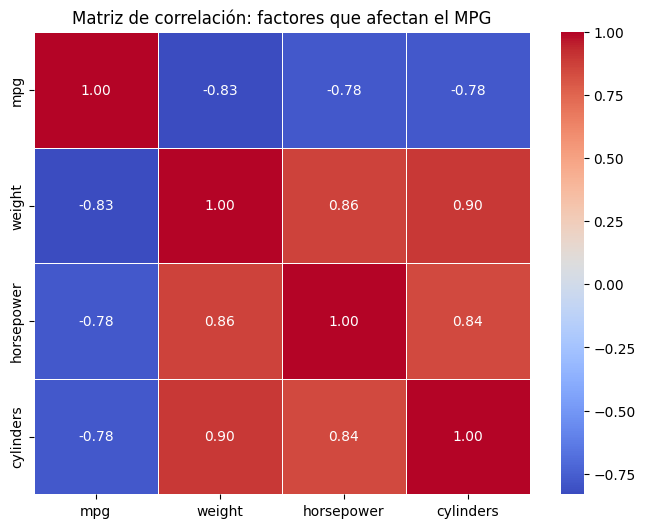

In [31]:
# 10 Seleccionar solo las columnas relevantes
variables = ['mpg', 'weight', 'horsepower', 'cylinders']
df_selected = df[variables].dropna()  # Eliminar valores nulos

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Personalizar el gráfico
plt.title("Matriz de correlación: factores que afectan el MPG")
plt.show()

**MEDIAS DE TENDENCIA CENTRAL Y DISPERSIÓN**

Media de MPG: 23.445918367346938
Mediana de MPG: 22.75
Moda de MPG: 13.0
Desviación estándar de MPG: 7.805007486571799
Varianza de MPG: 60.918141865441825
Rango de MPG: 37.6
Rango intercuartílico de MPG: 12.0


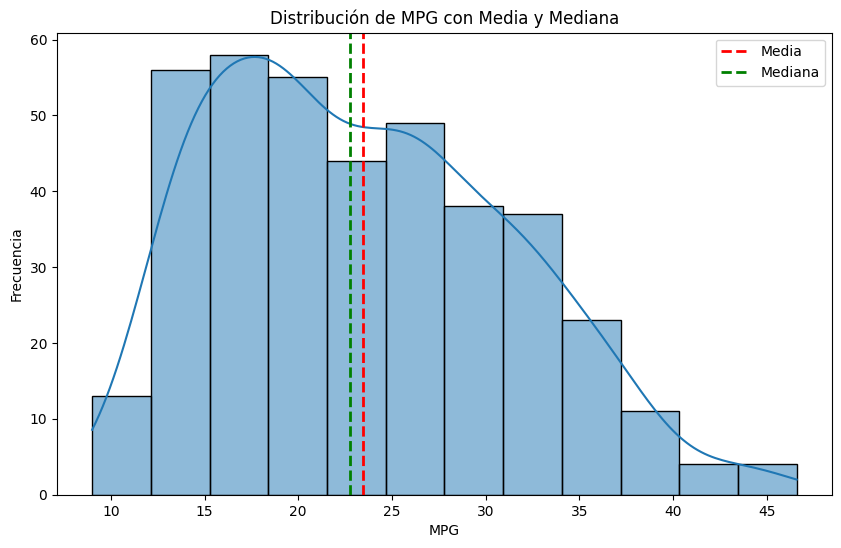

In [19]:
# prompt: Calcula e interpreta las medidas de tendencia central y medidas de dispersión para el dataset mpg y genera los gráficos correspondientes

import matplotlib.pyplot as plt
# Medidas de tendencia central
print("Media de MPG:", df['mpg'].mean())
print("Mediana de MPG:", df['mpg'].median())
print("Moda de MPG:", df['mpg'].mode()[0])  # La moda puede tener varios valores, tomamos el primero

# Medidas de dispersión
print("Desviación estándar de MPG:", df['mpg'].std())
print("Varianza de MPG:", df['mpg'].var())
print("Rango de MPG:", df['mpg'].max() - df['mpg'].min())
print("Rango intercuartílico de MPG:", df['mpg'].quantile(0.75) - df['mpg'].quantile(0.25))

# Histograma de MPG con línea vertical para la media
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], kde=True)
plt.axvline(df['mpg'].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(df['mpg'].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.title('Distribución de MPG con Media y Mediana')
plt.xlabel('MPG')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#Interpretación de las medidas:

#La media representa el promedio de MPG para todos los autos del conjunto de datos.
#La mediana representa el valor del MPG donde la mitad de los datos son mayores y la otra mitad son menores.
#La moda representa el valor de MPG que aparece con mayor frecuencia.

#La desviación estándar mide la dispersión de los datos alrededor de la media. Un valor alto indica que los datos están más dispersos, mientras que un valor bajo indica que los datos están más agrupados alrededor de la media.
#La varianza es el cuadrado de la desviación estándar.
#El rango es la diferencia entre el valor máximo y mínimo de los datos, mientras que el rango intercuartílico es la diferencia entre el tercer cuartil y el primer cuartil, indicando la dispersión de la mitad central de los datos.

#Se observa la distribución de MPG a través de un histograma. La media y la mediana están representadas por líneas verticales en el gráfico.
#Se puede observar si la distribución es simétrica o sesgada.
#Si la distribución es simétrica, la media y la mediana serán similares.
#Si la distribución está sesgada hacia la derecha, la media será mayor que la mediana, y si está sesgada hacia la izquierda, la media será menor que la mediana.


**PROBABILIDAD**

Número de combinaciones de 3 autos de 10: 120
Número de permutaciones de 5 autos: 120
Probabilidad de MPG > 25: 0.3979591836734694
Probabilidad de MPG > 25 dado origen 'usa': 0.22040816326530613


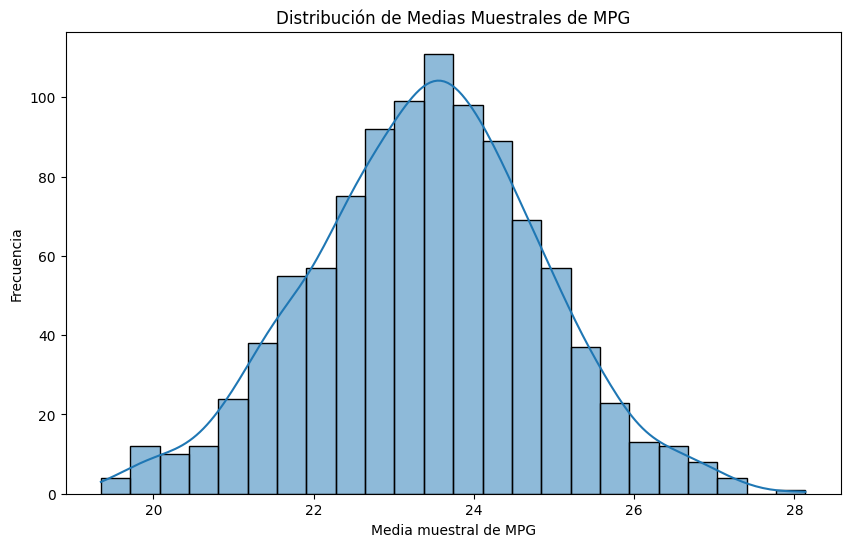

Prueba de Shapiro-Wilk: Estadístico=0.998, p-value=0.440


In [20]:
# prompt: Aplica los conceptos de probabilidad (combinaciones, permutaciones, distribución de probabilidad), para generar los códigos que mejor se adapten al dataset mpg
# y analizar los eventos relevantes y luego utiliza el teorema del límite central para justificar la normalidad de los datos, si es que aplica

#Probabilidad: Combinaciones y Permutaciones

from itertools import combinations, permutations

# Ejemplo 1: Número de maneras de seleccionar 3 autos de un conjunto de 10
n_autos = 10
k_seleccion = 3
combinaciones = list(combinations(range(n_autos), k_seleccion))
num_combinaciones = len(combinaciones)
print(f"Número de combinaciones de {k_seleccion} autos de {n_autos}: {num_combinaciones}")

# Ejemplo 2: Número de maneras de ordenar 5 autos en una fila
n_autos_orden = 5
permutaciones = list(permutations(range(n_autos_orden)))
num_permutaciones = len(permutaciones)
print(f"Número de permutaciones de {n_autos_orden} autos: {num_permutaciones}")

# Distribución de probabilidad: MPG
# Calcular la probabilidad de que un auto tenga un MPG mayor a 25
mpg_mayor_25 = df[df['mpg'] > 25]
prob_mpg_mayor_25 = len(mpg_mayor_25) / len(df)
print(f"Probabilidad de MPG > 25: {prob_mpg_mayor_25}")

# Probabilidad condicional: probabilidad de que un auto tenga un MPG mayor a 25 dado que es de origen 'usa'
mpg_mayor_25_usa = df[(df['mpg'] > 25) & (df['origin'] == 'usa')]
prob_mpg_mayor_25_dado_usa = len(mpg_mayor_25_usa) / len(df[df['origin'] == 'usa'])
print(f"Probabilidad de MPG > 25 dado origen 'usa': {prob_mpg_mayor_25_dado_usa}")


# Teorema del Límite Central

# Verificar normalidad de MPG usando el Teorema del Límite Central
# El TLC establece que la distribución muestral de las medias de muestras aleatorias e independientes,
# tomadas de cualquier distribución de población con media (μ) y desviación estándar (σ),
# se aproximará a una distribución normal con media (μ) y desviación estándar (σ/√n) a medida que n aumenta.

num_muestras = 1000
tamano_muestra = 30 # Se recomienda un tamaño de muestra >=30

medias_muestrales = []
for _ in range(num_muestras):
    muestra = df['mpg'].sample(n=tamano_muestra, replace=True)
    medias_muestrales.append(muestra.mean())

# Histograma de medias muestrales
plt.figure(figsize=(10, 6))
sns.histplot(medias_muestrales, kde=True)
plt.title('Distribución de Medias Muestrales de MPG')
plt.xlabel('Media muestral de MPG')
plt.ylabel('Frecuencia')
plt.show()

# Prueba de normalidad (opcional)
statistic, p_value = stats.shapiro(medias_muestrales)
print(f"Prueba de Shapiro-Wilk: Estadístico={statistic:.3f}, p-value={p_value:.3f}")

# Interpretar el p-value:
# Si el p-value es > 0.05, NO se rechaza la hipótesis nula de que los datos son normales.
# En este caso, si el p-value de las medias muestrales es >0.05, se puede justificar la aplicación del TLC y la normalidad.


**MUESTREO**

In [21]:
# prompt: Describe el método de muestreo utilizado y justifica su elección. Calcula el tamaño de la muestra (si aplica) y discute su representatividad en el contexto del dataset

# Dado que el dataset completo (df) se utiliza para todos los análisis y visualizaciones, se está utilizando un muestreo de tipo censal.
# No se extrae una muestra aleatoria del dataset, sino que se analizan todos los datos disponibles.

# Justificación:
# El tamaño del dataset es relativamente pequeño (398 filas después de eliminar los valores nulos).
# Un muestreo censal permite considerar todos los datos y realizar análisis más precisos, ya que no se pierde información.
# Dado el reducido tamaño del conjunto de datos, el coste computacional de procesar todo el conjunto de datos es bajo.
# En datasets más grandes, un muestreo probabilístico (aleatorio simple, estratificado, por conglomerados, etc.) podría ser más apropiado debido a las limitaciones de recursos computacionales y tiempo.

# Tamaño de la muestra:
# En este caso no se toma una muestra, se utiliza el dataset completo (398 filas)

# Representatividad:
# Debido a que se utilizan todos los datos, la muestra (el conjunto de datos completo) es representativa de la población total de datos disponibles. No hay sesgo por muestra, pero si hay que tener en cuenta los sesgos en los datos de origen.


**ESTADÍSTICA INFERENCIAL**

In [22]:
# prompt: Realiza una prueba de hipótesis para comparar dos poblaciones o analizar una sola población (la que mejor se adpate al dataset mpg) y calcula e interpreta intervalos de confianza para estimar parámetros poblacionales.

# 1. Prueba t para una muestra (para MPG)

# Hipótesis nula: La media del MPG de la población es igual a 20.
# Hipótesis alternativa: La media del MPG de la población es diferente a 20.

t_statistic, p_value = stats.ttest_1samp(df['mpg'], 20)

print(f"Prueba t para una muestra (MPG):")
print(f"Estadístico t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. La media del MPG de la población es significativamente diferente a 20.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para concluir que la media del MPG de la población es diferente a 20.")

# Intervalo de confianza para la media del MPG
confidence_level = 0.95
degrees_of_freedom = len(df['mpg']) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, loc=df['mpg'].mean(), scale=stats.sem(df['mpg']))

print(f"Intervalo de confianza del {confidence_level*100:.0f}% para la media del MPG: {confidence_interval}")

#Interpretación del intervalo de confianza:
#Con un nivel de confianza del 95%, se estima que la media poblacional del MPG se encuentra entre los valores del intervalo calculado.


# 2. Prueba t para dos muestras independientes (ej. MPG para autos de origen USA vs. Japón)

# Hipótesis nula: No hay diferencia significativa en la media de MPG entre autos de origen USA y Japón.
# Hipótesis alternativa: Hay diferencia significativa en la media de MPG entre autos de origen USA y Japón.


usa_mpg = df[df['origin'] == 'usa']['mpg']
japan_mpg = df[df['origin'] == 'japan']['mpg']

t_statistic, p_value = stats.ttest_ind(usa_mpg, japan_mpg)

print(f"\nPrueba t para dos muestras independientes (MPG USA vs. Japón):")
print(f"Estadístico t: {t_statistic:.2f}")
print(f"Valor p: {p_value:.3f}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe diferencia significativa en el MPG medio entre los dos países.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia de una diferencia significativa en el MPG medio entre los dos países.")


#Intervalo de confianza para la diferencia de medias
confidence_interval_diff = stats.t.interval(confidence_level, degrees_of_freedom, loc=usa_mpg.mean() - japan_mpg.mean(), scale=stats.sem(usa_mpg) + stats.sem(japan_mpg))

print(f"Intervalo de confianza del {confidence_level*100:.0f}% para la diferencia de medias del MPG (USA - Japón): {confidence_interval_diff}")


Prueba t para una muestra (MPG):
Estadístico t: 8.74
Valor p: 0.000
Rechazamos la hipótesis nula. La media del MPG de la población es significativamente diferente a 20.
Intervalo de confianza del 95% para la media del MPG: (22.670877187773137, 24.22095954692074)

Prueba t para dos muestras independientes (MPG USA vs. Japón):
Estadístico t: -12.66
Valor p: 0.000
Rechazamos la hipótesis nula. Existe diferencia significativa en el MPG medio entre los dos países.
Intervalo de confianza del 95% para la diferencia de medias del MPG (USA - Japón): (-12.57322204853839, -8.261104998736215)
